In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from scipy.stats import iqr

In [2]:
df = pd.read_csv("abalone.csv")
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df1 = df
df1.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
Age = df['Rings'] + 1.5 
df['Age'] = Age
df = df.drop('Rings', axis=1)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [6]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
dtype: int64

In [7]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [8]:
c = df.corr()
c

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Age,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


## Data visualization

C:\Users\sundaram\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

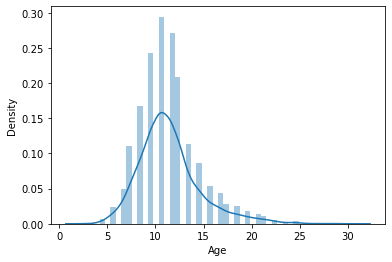

In [9]:
sns.distplot(df['Age'])     #univariate analysis

C:\Users\sundaram\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

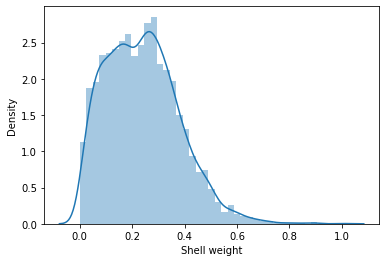

In [10]:
sns.distplot(df['Shell weight']) 

C:\Users\sundaram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Whole weight'>

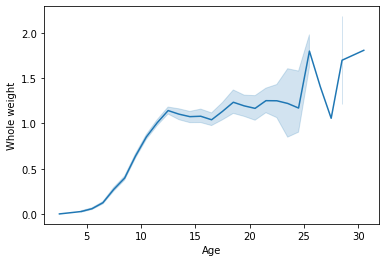

In [11]:
sns.lineplot(df['Age'],df['Whole weight'])  #bivariate analysis

C:\Users\sundaram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Whole weight'>

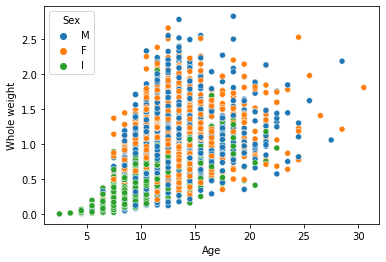

In [12]:
sns.scatterplot(df['Age'],df['Whole weight'],hue = df['Sex'])  #multivariate analysis

## Descriptive analytics

In [13]:
df.mean()  

C:\Users\sundaram\AppData\Local\Temp\ipykernel_6776\2741190021.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


Length             0.523992
Diameter           0.407881
Height             0.139516
Whole weight       0.828742
Shucked weight     0.359367
Viscera weight     0.180594
Shell weight       0.238831
Age               11.433684
dtype: float64

In [14]:
df.median()

C:\Users\sundaram\AppData\Local\Temp\ipykernel_6776\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


Length             0.5450
Diameter           0.4250
Height             0.1400
Whole weight       0.7995
Shucked weight     0.3360
Viscera weight     0.1710
Shell weight       0.2340
Age               10.5000
dtype: float64

In [15]:
df.mode()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.550,0.45,0.15,0.2225,0.175,0.1715,0.275,10.5
1,NaN,0.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.value_counts()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  Shell weight  Age 
F    0.275   0.195     0.070   0.0800        0.0310          0.0215          0.0250        6.5     1
M    0.400   0.320     0.095   0.3030        0.1335          0.0600          0.1000        8.5     1
     0.405   0.305     0.120   0.3185        0.1235          0.0905          0.0950        8.5     1
             0.310     0.100   0.3850        0.1730          0.0915          0.1100        8.5     1
     0.410   0.300     0.100   0.3010        0.1240          0.0690          0.0900        10.5    1
                                                                                                  ..
I    0.250   0.185     0.065   0.0710        0.0270          0.0185          0.0225        6.5     1
             0.190     0.060   0.0765        0.0360          0.0115          0.0245        7.5     1
                       0.065   0.0835        0.0390          0.0150          0.0250        6.5  

In [17]:
df['Age'].mean()

11.433684462532918

In [18]:
df['Age'].var()

10.395265947347035

In [19]:
df['Age'].std()

3.2241690320681133

In [20]:
df.skew()

C:\Users\sundaram\AppData\Local\Temp\ipykernel_6776\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Age               1.114102
dtype: float64

## Outliers

In [21]:
q = df.quantile([0.75,0.25])
q

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0.75,0.615,0.48,0.165,1.1530,0.502,0.2530,0.329,12.5
0.25,0.450,0.35,0.115,0.4415,0.186,0.0935,0.130,9.5


C:\Users\sundaram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

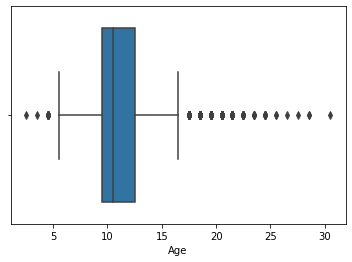

In [22]:
sns.boxplot(df['Age'])

In [23]:
iqr = q.iloc[0] - q.iloc[1]
iqr

Length            0.1650
Diameter          0.1300
Height            0.0500
Whole weight      0.7115
Shucked weight    0.3160
Viscera weight    0.1595
Shell weight      0.1990
Age               3.0000
dtype: float64

In [24]:
u = q.iloc[0] + (1.5 * iqr) # u = q3+1.5*iqr
u

Length             0.86250
Diameter           0.67500
Height             0.24000
Whole weight       2.22025
Shucked weight     0.97600
Viscera weight     0.49225
Shell weight       0.62750
Age               17.00000
dtype: float64

In [25]:
l = q.iloc[1] - (1.5 *iqr) 
l

Length            0.20250
Diameter          0.15500
Height            0.04000
Whole weight     -0.62575
Shucked weight   -0.28800
Viscera weight   -0.14575
Shell weight     -0.16850
Age               5.00000
dtype: float64

## Handling outliers

In [26]:
df1['Length'] = np.where(df1['Length'] <0.3,0.3,df1['Length'])

C:\Users\sundaram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length'>

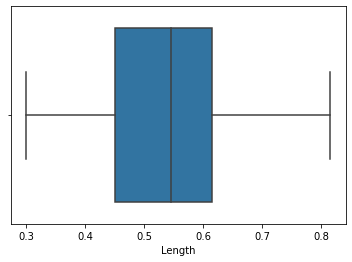

In [27]:
sns.boxplot(df1['Length'])

## Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#le = LabelEncoder()
oh = OneHotEncoder()
oh_data = pd.DataFrame(oh.fit_transform(df[['Sex']]).toarray())
New_df=df.join(oh_data)

In [29]:
New_df = New_df.drop('Sex', axis=1)
New_df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,0,1,2
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5,0.0,0.0,1.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5,0.0,0.0,1.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5,1.0,0.0,0.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5,0.0,0.0,1.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5,0.0,1.0,0.0


In [30]:
x = New_df.iloc[:,0:7]
z=New_df.iloc[:,8:12]
x = x.join(z)
x

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,0,1,2
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0.0,0.0,1.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0.0,0.0,1.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1.0,0.0,0.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0.0,0.0,1.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1.0,0.0,0.0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0.0,0.0,1.0
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0.0,0.0,1.0
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1.0,0.0,0.0


In [31]:
y=New_df['Age']
y

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: Age, Length: 4177, dtype: float64

##  Scaling

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
x_scaled = sc.fit_transform(x)
x_scaled 

C:\Users\sundaram\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\sundaram\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([[-0.57455813, -0.43214879, -1.06442415, ..., -0.67483383,
        -0.68801788,  1.31667716],
       [-1.44898585, -1.439929  , -1.18397831, ..., -0.67483383,
        -0.68801788,  1.31667716],
       [ 0.05003309,  0.12213032, -0.10799087, ...,  1.48184628,
        -0.68801788, -0.75948762],
       ...,
       [ 0.6329849 ,  0.67640943,  1.56576738, ..., -0.67483383,
        -0.68801788,  1.31667716],
       [ 0.84118198,  0.77718745,  0.25067161, ...,  1.48184628,
        -0.68801788, -0.75948762],
       [ 1.54905203,  1.48263359,  1.32665906, ..., -0.67483383,
        -0.68801788,  1.31667716]])

## Splitting dataset into train and test

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.3,random_state =0)

In [34]:
x_train

array([[ 0.79954256,  1.0291325 ,  0.84844242, ..., -0.67483383,
        -0.68801788,  1.31667716],
       [-1.49062526, -1.54070702, -1.30353247, ..., -0.67483383,
         1.45345059, -0.75948762],
       [-1.24078877, -1.33915098, -1.06442415, ..., -0.67483383,
         1.45345059, -0.75948762],
       ...,
       [ 0.59134549,  0.42446438,  0.13111745, ..., -0.67483383,
        -0.68801788,  1.31667716],
       [ 0.84118198,  0.82757646,  0.6093341 , ...,  1.48184628,
        -0.68801788, -0.75948762],
       [-0.94931287, -0.83526087, -0.70576167, ..., -0.67483383,
         1.45345059, -0.75948762]])

In [35]:
x_test

array([[ 0.21659075,  0.17251933,  0.37022577, ..., -0.67483383,
        -0.68801788,  1.31667716],
       [-0.1998034 , -0.07942572, -0.46665335, ..., -0.67483383,
         1.45345059, -0.75948762],
       [ 0.79954256,  0.72679844,  0.37022577, ..., -0.67483383,
        -0.68801788,  1.31667716],
       ...,
       [ 0.92446081,  0.87796547, -2.97729071, ...,  1.48184628,
        -0.68801788, -0.75948762],
       [ 1.13265788,  0.97874349,  1.44621322, ..., -0.67483383,
        -0.68801788,  1.31667716],
       [ 0.79954256,  0.77718745,  0.72888826, ..., -0.67483383,
         1.45345059, -0.75948762]])

In [36]:
y_train

1376    11.5
1225     6.5
2722     8.5
3387    19.5
2773    12.5
        ... 
1033    11.5
3264    13.5
1653    11.5
2607    10.5
2732     9.5
Name: Age, Length: 2923, dtype: float64

In [37]:
y_test

668     14.5
1580     9.5
3784    12.5
463      6.5
2615    13.5
        ... 
1052    13.5
3439     9.5
1174    10.5
2210    19.5
2408    16.5
Name: Age, Length: 1254, dtype: float64

## Training the model

In [38]:
from sklearn.linear_model import LinearRegression
llr = LinearRegression()
llr.fit(x_train,y_train)

LinearRegression()

In [39]:
pred = llr.predict(x_test)

In [40]:
pred

array([14.72319148, 10.63647192, 11.82013209, ..., 10.7343318 ,
       20.24528598, 12.46661461])

In [41]:
llr.score(x_train,y_train)

0.5421813577211398

In [42]:
llr.score(x_test,y_test)

0.5253868694528043

In [43]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(pred,y_test)
mse 

5.003851007700237

In [44]:
rmse = np.sqrt(mse)   
rmse

2.236928923256221

In [45]:
r2_score(pred,y_test)    

0.11250121827339843

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures  
poly_regs= PolynomialFeatures(degree= 3)
x_poly = poly_regs.fit_transform(x_train)
lin_reg_2 =LinearRegression()  
lin_reg_2.fit(x_poly, y_train)  

LinearRegression()

In [47]:
pred_1 = lin_reg_2.predict(poly_regs.fit_transform(x_test))
pred_1

array([16.6989975 , 10.67616272, 12.3482132 , ..., 16.70387268,
       21.37137604, 13.42271423])

In [48]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(pred_1,y_test)
mse

4.978068228490048

In [49]:
rmse = np.sqrt(mse)
rmse

2.2311584947040513

In [50]:
r2_score(y_test,pred_1)

0.5278323550470645